In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [32]:
states = pd.read_excel('state_data.xlsx', skiprows=4)

In [33]:
states.columns= ['Fips', 'state', 'year', 'population', 'total_labor_force', 'percent_labor_force', 'total_employment', 'percent_employment', 'total_unemployment', 'percent_unemployment']
states.head()

,Fips,state,year,population,total_labor_force,percent_labor_force,total_employment,percent_employment,total_unemployment,percent_unemployment
0,NaN,NaN,NaN,NaN,NaN,NaN,Total,Percent of population,Total,Rate
1,NaN,NaN,NaN,NaN,NaN,NaN,Labor force,NaN,level,rate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Alabama,1976.0,2632667.0,1501284.0,57.0,1399080,53.1,102204,6.8
4,2.0,Alaska,1976.0,239917.0,163570.0,68.2,151190,63,12380,7.6


In [34]:
states.drop([0,1,2], inplace=True)
states.drop('Fips', axis=1, inplace=True)

In [35]:
states.head()

,state,year,population,total_labor_force,percent_labor_force,total_employment,percent_employment,total_unemployment,percent_unemployment
3,Alabama,1976.0,2632667.0,1501284.0,57.0,1399080,53.1,102204,6.8
4,Alaska,1976.0,239917.0,163570.0,68.2,151190,63,12380,7.6
5,Arizona,1976.0,1650917.0,987060.0,59.8,890988,54,96072,9.7
6,Arkansas,1976.0,1546583.0,891608.0,57.7,829394,53.6,62214,7
7,California,1976.0,15823750.0,9899372.0,62.6,8994291,56.8,905081,9.1


In [36]:
states = states[(~states.state.str.contains('County')) & (~states.state.str.contains('City'))]

In [41]:
states['year'] = states.year.astype(int)

In [45]:
eighty = states.loc[states.year == 1980, :]

In [51]:
eightyLf = {}
for index, row in eighty.iterrows():
    eightyLf[row['state']] = row['percent_labor_force']

In [91]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib
import matplotlib.cm as cm

def plotStateData(dataDict):
    # Lambert Conformal map of lower 48 states.
   
    lst = [v for k, v in dataDict.items()]   
    minima = min(lst)
    maxima = max(lst)
    
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.hot)
        
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    # data from U.S Census Bureau
    # http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    # population density by state from
    # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
    # choose  color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.hot # use 'hot' colormap
    vmin = 0; vmax = 400 # set range.

    for shapedict in m.states_info:
        statename = shapedict['NAME']
         # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            val = dataDict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = mapper.to_rgba(val) #= cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
            #colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    # draw meridians and parallels.
    m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
    mapper.set_array(lst)
    m.colorbar(mapper)
    plt.title('Filling State Polygons by Population Density')
    plt.show()



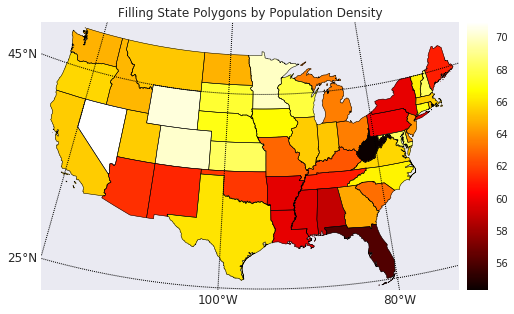

In [92]:
plotStateData(eightyLf)

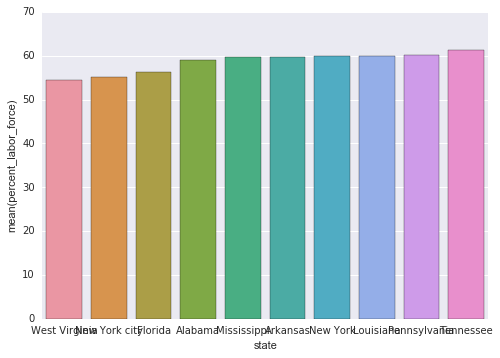

In [80]:
import seaborn as sns
sns.barplot(data=eighty.sort_values('percent_labor_force').iloc[:10, :], x='state', y='percent_labor_force')